In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

sns.set_style('darkgrid')

Сперва загрузим датасет

In [3]:
data = pd.read_csv('healthcare_dataset.csv')

In [4]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Данный датасет представляет собой набор даннх о пациентах и о медицинской помощи, которая была им предоставлена. 

Данный датасет взят с [Kaggle](https://www.kaggle.com/datasets/prasad22/healthcare-dataset), откуды мы можем узнать подробное описание каждого признака:  

> Name: This column represents the name of the patient associated with the healthcare record. 

> Age: The age of the patient at the time of admission, expressed in years.  

> Gender: Indicates the gender of the patient, either "Male" or "Female."  

> Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).  

> Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.  

> Date of Admission: The date on which the patient was admitted to the healthcare facility.  

> Doctor: The name of the doctor responsible for the patient's care during their admission.  

> Hospital: Identifies the healthcare facility or hospital where the patient was admitted.  

> Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."  

> Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.  

> Room Number: The room number where the patient was accommodated during their admission.  

> Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.  

> Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.  

> Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."  

> Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.  


**Основная задача**: прогнозирование состояния пациента после его лечения.

### DATA PREPROCESSING

Для начала получим общую информациб о данных. Изучим типы данных и количество записей:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
data[data['Billing Amount'] < 0]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.507813,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,-1018.245371,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,-109.097122,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,-576.727907,369,Urgent,2021-04-17,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,JosEPh cOx,23,Male,AB-,Diabetes,2019-10-13,Peter Smith,Inc Ward,Blue Cross,-353.865186,271,Elective,2019-10-25,Lipitor,Inconclusive
53204,AsHley WaRnER,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
53232,dAnIel dRaKe,68,Female,B+,Hypertension,2020-04-24,Brett Ray,Carr Ltd,Aetna,-591.917419,426,Elective,2020-04-26,Lipitor,Abnormal
54136,DR. micHaEl MckAy,64,Male,O+,Cancer,2019-05-31,Dawn Navarro,"Mcconnell and Rios, Clark",UnitedHealthcare,-199.663795,122,Urgent,2019-06-12,Ibuprofen,Abnormal


Теперь рассмотрим статистическое описание числовых столбцов

In [7]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Полученные значения указывают на следующее:  

- средний возраст пациентов **51.5 лет**, с разбросом примерно **19.6 лет**. Возраст самого старого пациента составляет **89 лет**, самого молодого - **13 лет**;   
- средняя сумма, взимаемая за медицинские услуги, составляет **25539.3**, однако обнаружены отрицательные значения.  

Необходимо обратить особое внимание на отрицательные значение в столбце **'Billing Amount'**, так как они могут указывать на ошибки ввода данных или на возврат средств.  
  
  
Посмотрим, есть ли пропущенные значения в данных:

In [8]:
data.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Пропущенные значения отсутствуют.

### Data types conversion

Так как столбцы с датами поступления и выписки представлены в формате *'object'*, преобразуем эти признаки в *'datetime'*.

In [9]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

### Categorical features

После анализа числовых признаков, перейдем к изучению категориальных данных. Для начала определим, какие столбцы в нашем датасете относятся к категориальным:

In [10]:
data.select_dtypes(include='object').columns.to_list()

['Name',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

Первым делом рассмотрим уникальные значения в столбцах, содержащих названия госпиталей и имена врачей.

In [11]:
len(data['Doctor'].unique()), len(data['Hospital'].unique())

(40341, 39876)

Обнаружено, что количество уникальных врачей **40341** и госпиталей **39876** приближается к общему числу наблюдений **55000**, что указывает на высокую степень разнообразия этих признаков.

In [12]:
data.groupby('Hospital')['Test Results'].nunique()

Hospital
Abbott Inc                       1
Abbott Ltd                       1
Abbott Moore and Williams,       1
Abbott and Thompson, Sullivan    1
Abbott, Peters and Hoffman       1
                                ..
and Zimmerman Sons               1
and Zuniga Davis Carlson,        1
and Zuniga Francis Peterson,     1
and Zuniga Sons                  1
and Zuniga Thompson, Blake       1
Name: Test Results, Length: 39876, dtype: int64

In [13]:
data.groupby('Doctor')['Test Results'].nunique()

Doctor
Aaron Acevedo      1
Aaron Adams        1
Aaron Aguilar      1
Aaron Alexander    1
Aaron Anderson     1
                  ..
Zoe Khan           1
Zoe Knight         1
Zoe Nichols        1
Zoe Roberts        1
Zoe Wallace        1
Name: Test Results, Length: 40341, dtype: int64

Из анализа видно, что каждый врач и каждый госпиталь имеют практически уникальные наборы результатов тестов. Это свидетельствует о том, что эти признаки не несут существенной информативной нагрузки для нашей задачи прогнозирования результатов выздоровления, так как не позволяют выделить какие-либо общие закономерности.  
  
Исходя из этого, было принято решение удалить столбцы **'Hospital'** и **'Doctor'** из набора данных. Кроме того, столбцы **'Name'** и **'Room Number'** также были исключены, поскольку они не предоставляют информации, релевантной для прогнозирования результатов выздоровления.

In [14]:
data = data.drop(['Name', 'Hospital', 'Doctor', 'Room Number'], axis=1)

После удаления неинформативных признаков, таких как имена пациентов, врачей, названия госпиталей и номера палат, перейдем к кодированию оставшихся категориальных данных.  
  
Для признака **'Gender'** применим mapping, чтобы преобразовать строковые значения в числовые

In [15]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
data['Gender'] = data['Gender'].map({
    'Male': 0,
    'Female': 1
})

Целевая переменная **'Test Results'**, представляющая результаты тестов *(Abnormal, Inconclusive, Normal)*, будет закодирована с использованием *Label Encoder*. Это позволит нам преобразовать категориальные значения в числовые метки, где:
- **'Abnormal'** будет представлено как 0;
- **'Inconclusive'** как 1;
- **'Normal'** как 2.

In [17]:
label_encoder = LabelEncoder()
data['Test Results'] = label_encoder.fit_transform(data['Test Results'])

for cat, code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{cat}: {code}")

Abnormal: 0
Inconclusive: 1
Normal: 2


Теперь обратим внимание на оставшиеся категориальные признаки.  

Для определения оптимального метода кодирования посмотрим на количество уникальных категорий в каждом из этих признаков.

In [18]:
cat_features = data.select_dtypes(include='object').columns.to_list()

In [19]:
for el in list(cat_features):
    print(f"'{el}' column's unique values:\n {data[el].unique()}\n")

'Blood Type' column's unique values:
 ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

'Medical Condition' column's unique values:
 ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

'Insurance Provider' column's unique values:
 ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

'Admission Type' column's unique values:
 ['Urgent' 'Emergency' 'Elective']

'Medication' column's unique values:
 ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']



Как видно, минимальное количество категорий составляет 3, а максимальное - 8. 

Учитывая то, что признаки имеют не большое количество категорий, *One-Hot Encoding* будет наиболее подходящим методом.  

*One-Hot Encoding* позволит нам преобразовать каждую категорию в отдельный бинарный столбец, что обеспечит корректное представление категориальных данных для дальнейшего анализа и моделирования.

In [20]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_df = one_hot_encoder.fit_transform(data[cat_features])

data_encoded = pd.DataFrame(one_hot_df, columns=one_hot_encoder.get_feature_names_out(cat_features))
data_encoded = pd.concat([data, data_encoded], axis=1)
data_encoded = data_encoded.drop(cat_features, axis=1)

In [19]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Age                                  55500 non-null  int64         
 1   Gender                               55500 non-null  int64         
 2   Date of Admission                    55500 non-null  datetime64[ns]
 3   Billing Amount                       55500 non-null  float64       
 4   Discharge Date                       55500 non-null  datetime64[ns]
 5   Test Results                         55500 non-null  int64         
 6   Blood Type_A+                        55500 non-null  float64       
 7   Blood Type_A-                        55500 non-null  float64       
 8   Blood Type_AB+                       55500 non-null  float64       
 9   Blood Type_AB-                       55500 non-null  float64       
 10  Blood Type

Теперь набор данных полностью подготовлен для дальнейшего анализа и построения моделей.

### Datatime new feature

Для более глубокого понимания влияния тяжести заболевания на результаты лечения, мы создадим новый признак – **'продолжительность лечения'**.  

Этот признак позволит нам оценить, как длительность пребывания пациента в медицинском учреждении коррелирует с исходом лечения. Предполагается, что пациенты с более длительным периодом лечения могут иметь более сложные случаи, что, в свою очередь, может отразиться на результатах их анализов.

In [24]:
data_encoded['Days in Hospital'] = (data_encoded['Discharge Date'] - data_encoded['Date of Admission']).dt.days

## IN PROCESS

### Outliers

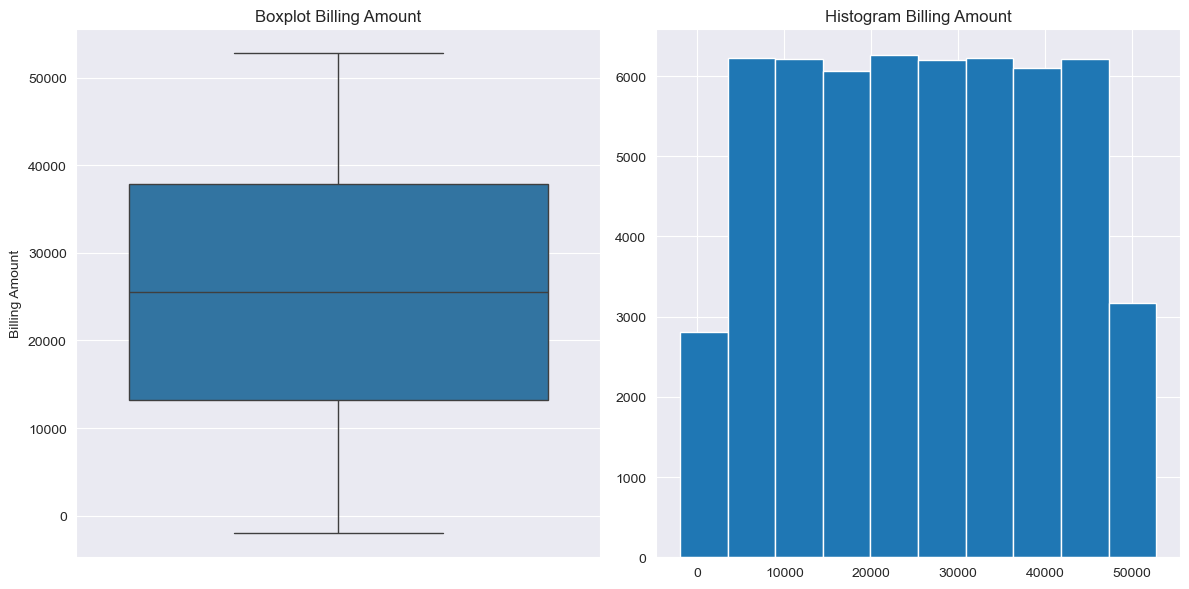

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data_encoded['Billing Amount'], ax=axes[0])
axes[0].set_title('Boxplot Billing Amount')

data_encoded['Billing Amount'].hist(ax=axes[1])
axes[1].set_title('Histogram Billing Amount')

plt.tight_layout()
plt.show()

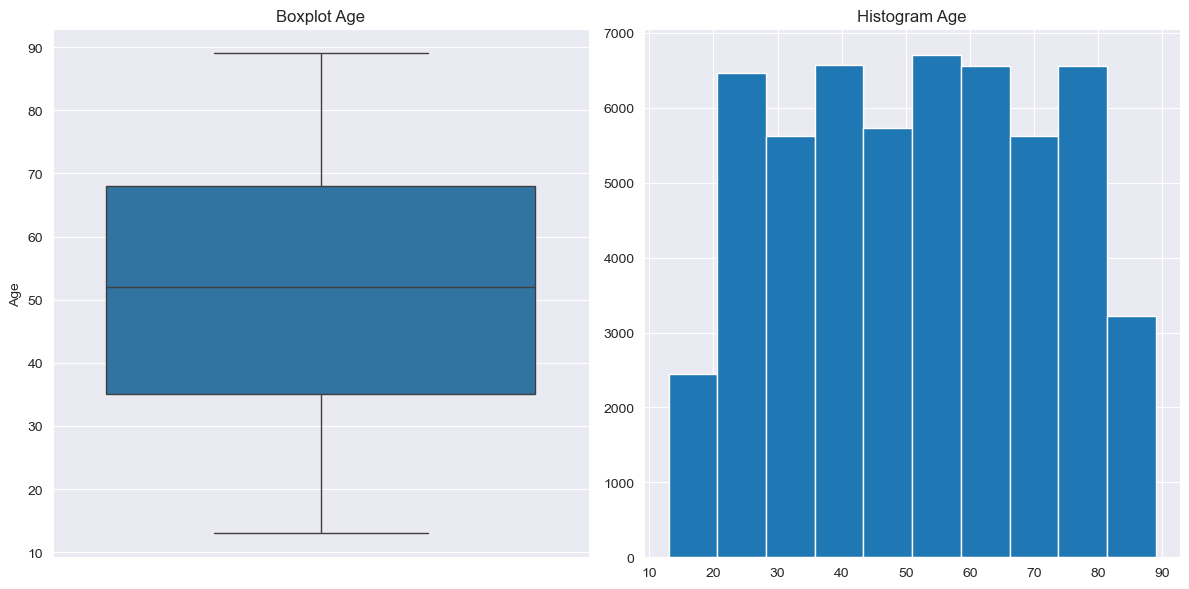

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data_encoded['Age'], ax=axes[0])
axes[0].set_title('Boxplot Age')

data['Age'].hist(ax=axes[1])
axes[1].set_title('Histogram Age')

plt.tight_layout()
plt.show()

    как можем видеть выбросов нигде нет, распредления близки к нормальным. так же проверим, распределение количества дней в госпитале, чтобы избежать выбросов и некорректно введенных дат

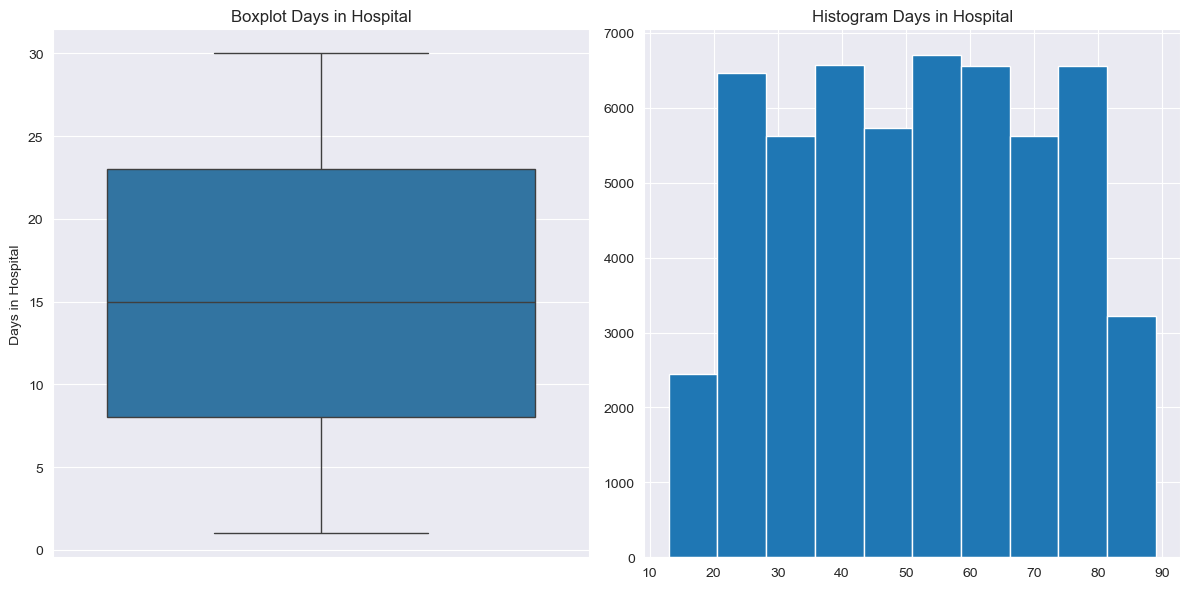

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data_encoded['Days in Hospital'], ax=axes[0])
axes[0].set_title('Boxplot Days in Hospital')

data['Age'].hist(ax=axes[1])
axes[1].set_title('Histogram Days in Hospital')

plt.tight_layout()
plt.show()

    тут так же выбросов никаких нет, значит все ок

### Visualisation analysis

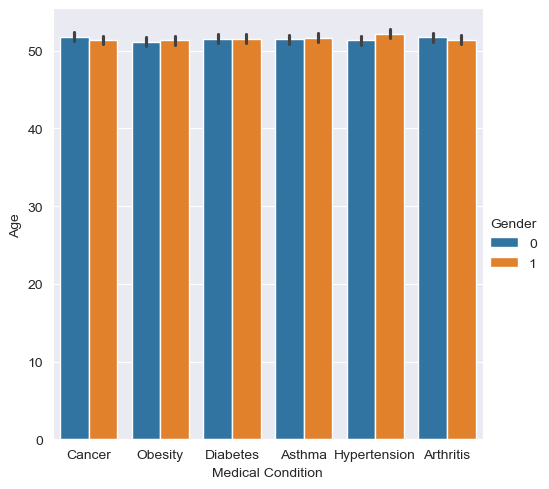

In [25]:
sns.catplot(x=data['Medical Condition'], y=data['Age'], hue=data['Gender'], kind='bar');

    как можно заметить нет явного заболевания которое проявлялось либо только в молодом либо только в пожилом возрасте.
    так же средний возраст пациента не зависит от пола

    теперь посмотрим на длительность болезни

In [26]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,0,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,2
1,62,0,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,1
2,76,1,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,2
3,28,1,O+,Diabetes,2020-11-18,Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,0
4,43,1,AB+,Cancer,2022-09-19,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,0


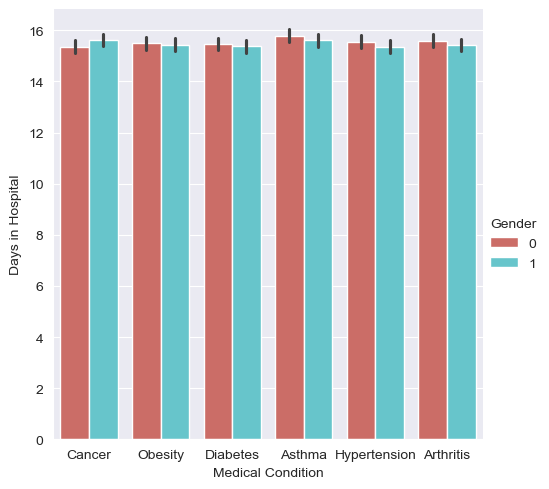

In [27]:
sns.catplot(x=data['Medical Condition'], y=data_encoded['Days in Hospital'], hue=data['Gender'], kind='bar', palette='hls');

    как можено увидеть количество дней проведенных в больнице не зависит от тяжести болезни

    посмотрим на распределение целевой переменной, чтобы понять баланс классов

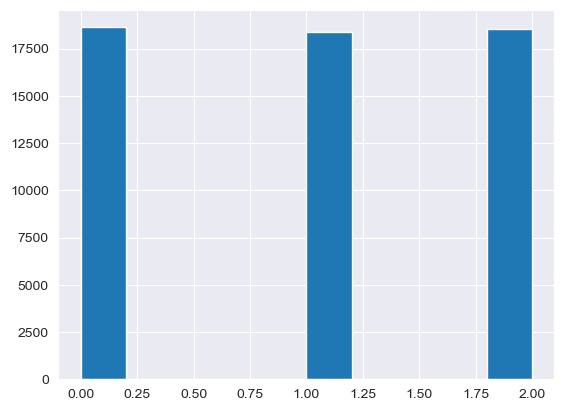

In [38]:
data_encoded['Test Results'].hist();

    дисбаланса в классах нет

### Correlation

<Axes: >

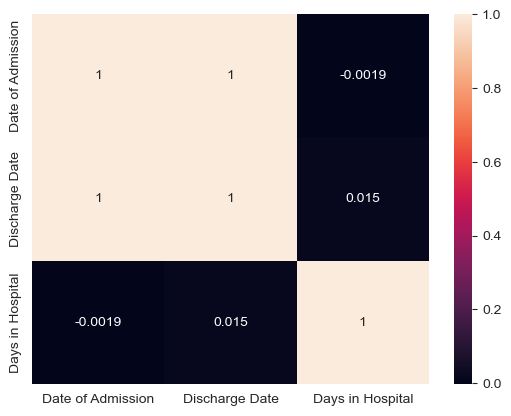

In [28]:
sns.heatmap(data_encoded.loc[:, ['Date of Admission', 'Discharge Date', 'Days in Hospital']].corr(), annot=True)